## TP - Préparation de données

### Importer les libraries 

In [ ]:
!pip install pandas 
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importer les données 

Importer le dataset [Loan](../../data/Loan_Default.csv) en utilisant pandas

In [64]:
df = pd.read_csv("../../data/Loan_Default.csv")
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


Visualiser le type de chaque données 

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

### Traitement des valeurs manquantes
Les données manquantes ne sont pas rares dans les ensembles de données réels. En fait, la probabilité qu'au moins un point de données soit manquant augmente avec la taille de l'ensemble de données. Les données manquantes peuvent se produire de plusieurs façons, dont les suivantes.
- Fusion d'ensembles de données sources
- Événements aléatoires

#### Visualisation des données manquantes (petit dataset)
Les visualisations ainsi que les résumés numériques sont la première étape pour comprendre le défi que représente l'information manquante dans un ensemble de données. Pour les données de taille petite à moyenne (des centaines d'échantillons et des centaines d'attributs), il existe plusieurs techniques qui permettent de visualiser simultanément tous les échantillons et tous les attributs.


**Visualisations pour les valeurs manquantes** :

- Matrice
- Corrélation Carte thermique
- Dendrogramme
- Résumés numériques simples

In [15]:
import missingno as msno # pip install missingno (Il faut installer le package dans l'environnement python)

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

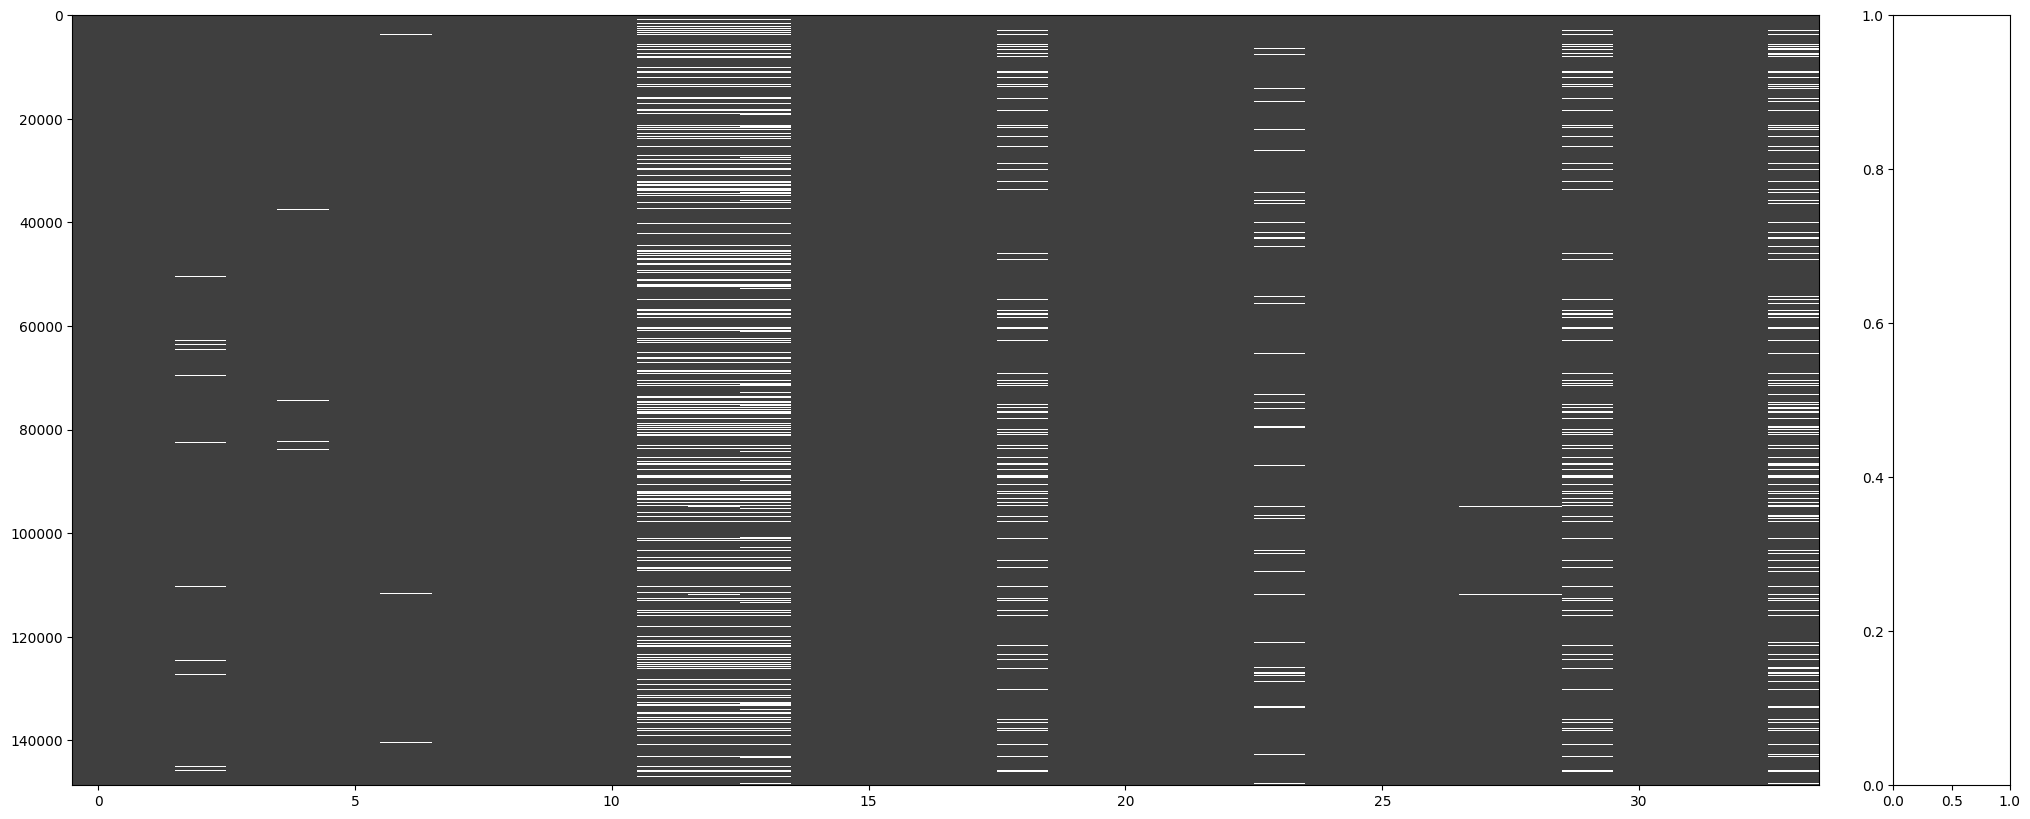

In [16]:
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

Le graphique ci-dessus nous permet d'interpréter que notre ensemble de données contient de nombreuses valeurs manquantes.

Heatmap de corrélation mesure la corrélation de nullité entre les colonnes de l'ensemble de données. Elle montre à quel point la présence ou l'absence d'une caractéristique affecte l'autre.

**La corrélation de nullité est comprise entre -1 et 1 :**
- -1 signifie que si une colonne (attribut) est présente, l'autre est presque certainement absente.
- 0 signifie qu'il n'y a pas de dépendance entre les colonnes (attributs).
- 1 signifie que si une colonne (attribut) est présente, l'autre est certainement présente.

- Contrairement à la carte thermique de corrélation habituelle, de nombreuses colonnes sont absentes. Les colonnes qui sont toujours pleines ou toujours vides n'ont pas de corrélation significative et sont supprimées de la visualisation.

- La carte thermique est utile pour identifier les corrélations de complétude des données entre les paires d'attributs, mais elle n'a qu'une capacité d'explication limitée pour les relations plus larges et n'offre pas de support spécial pour les ensembles de données très volumineux.

<Axes: >

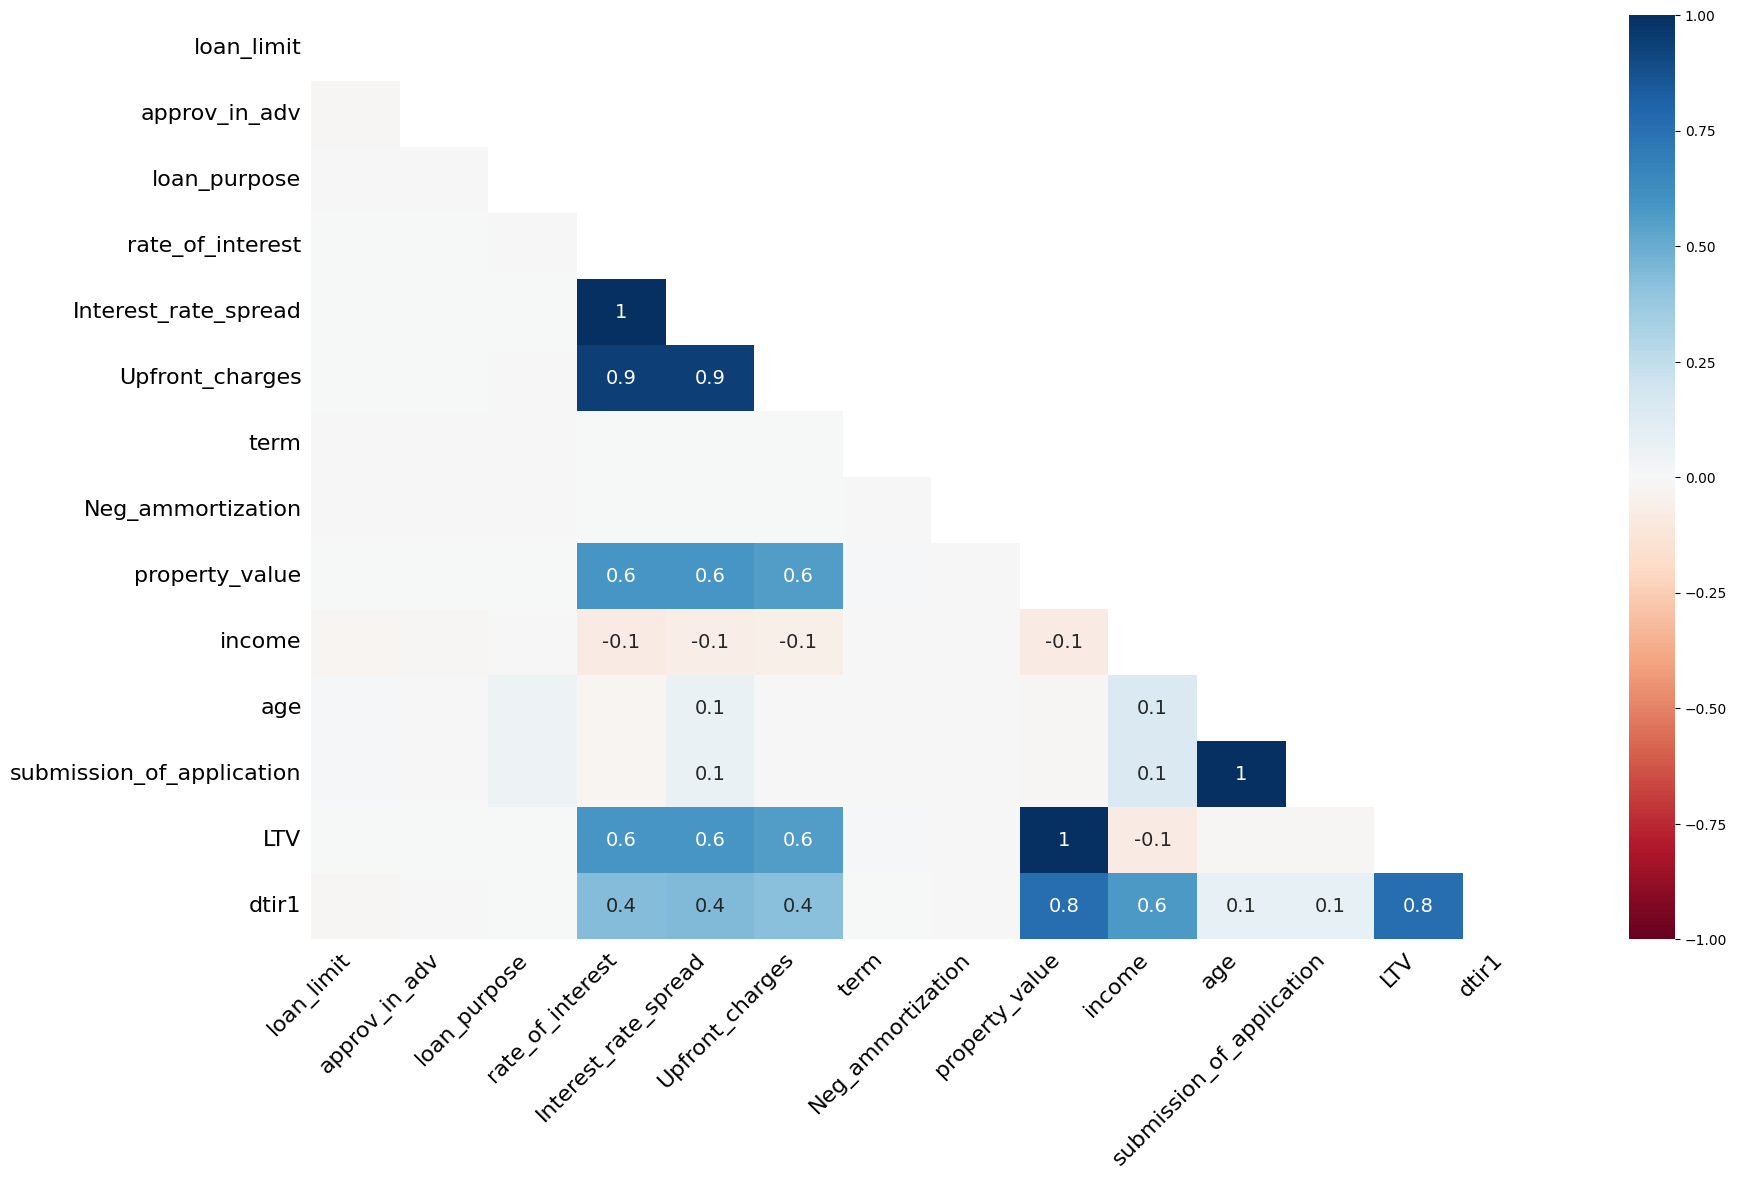

In [17]:
msno.heatmap(df, labels = True)

La visualisation ci-dessus nous permet d'interpréter facilement l'absence des attributs rate_of_interest et upfront_charges comme étant dépendants l'un de l'autre (valeur de corrélation = 1), ce qui signifie que si l'un est présent, l'autre le sera également.

Le dendrogramme montre la relation hiérarchique de nullité entre les colonnes. Le dendrogramme utilise un algorithme de regroupement hiérarchique en fonction de leur corrélation de nullité.

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

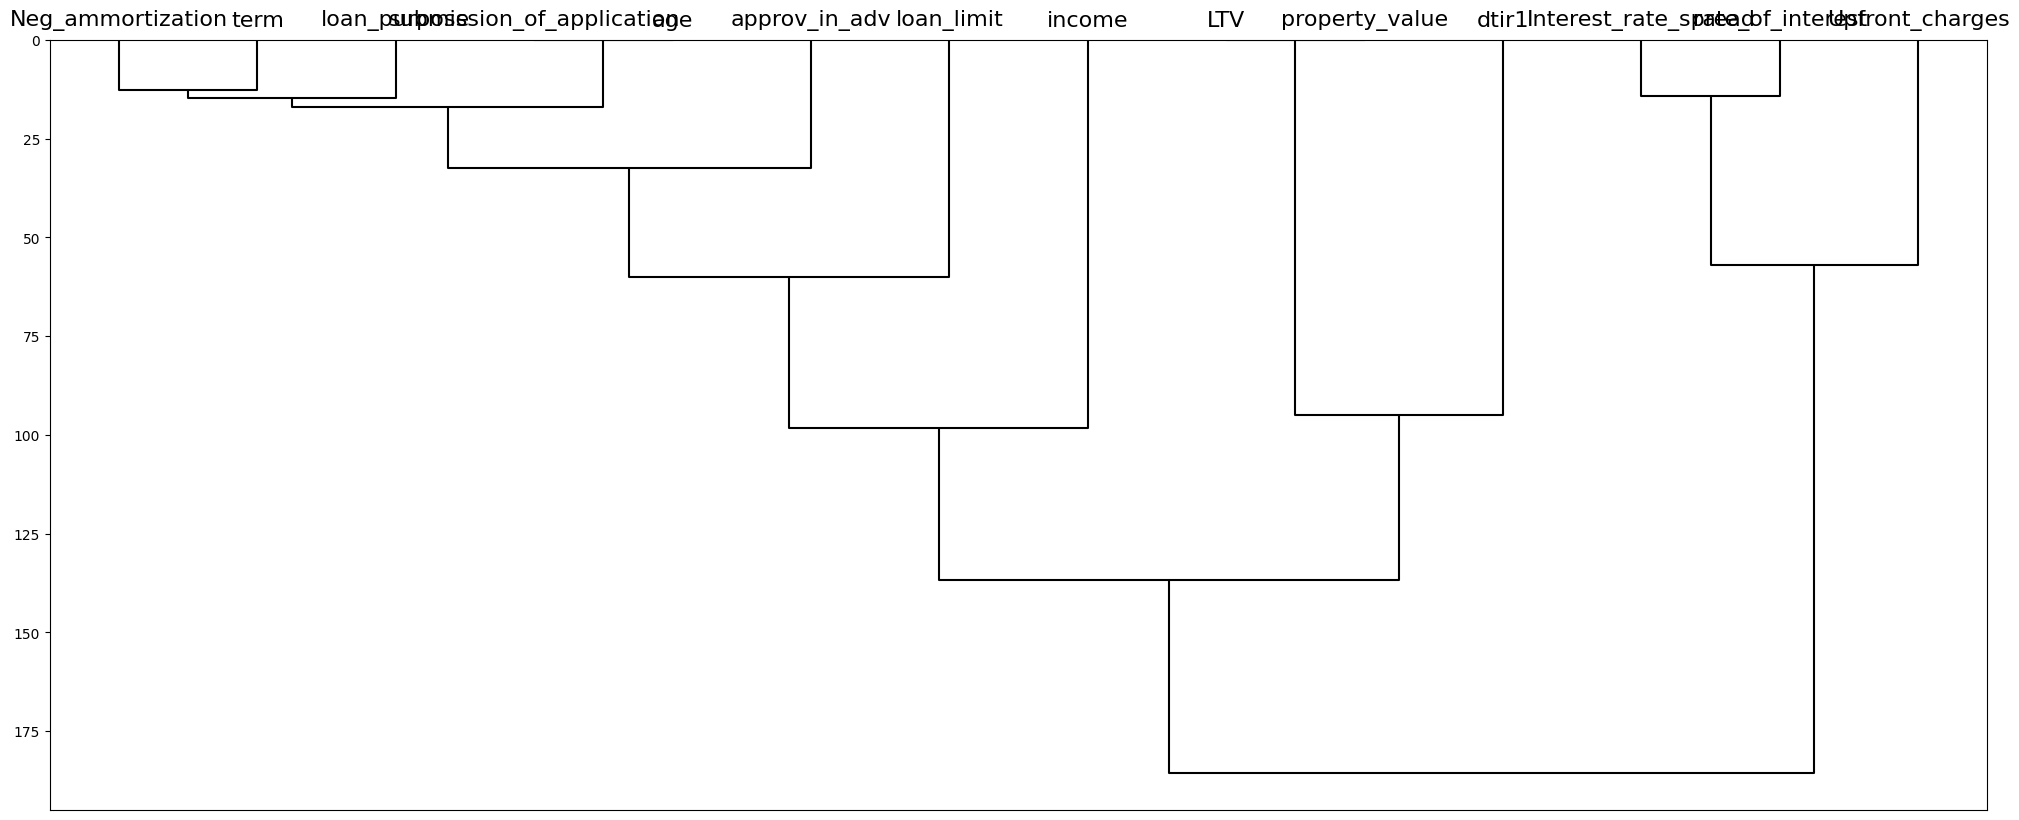

In [30]:
# Columns having missing values
missing_value_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
msno.dendrogram(df[missing_value_columns])

Nous interprétons le dendrogramme selon une approche descendante, c'est-à-dire en nous concentrant sur la hauteur à laquelle deux colonnes sont reliées par des questions de nullité. Plus la hauteur est importante, moins la relation l'est, et l'inverse est également vrai.

Par exemple, si la paire d'attributs LTV et valeur de la propriété a une hauteur de 0, cela signifie qu'ils sont fortement corrélés en cas de nullité. De même, l'attribut LTV et le taux d'intérêt ont une hauteur maximale, ce qui signifie qu'ils sont moins corrélés l'un à l'autre.

Moving Forward lets try to analyse numerical summary of missing attributes. Simple numerical summaries are effective at identifying problematic predictors and samples when the data become too large to visually inspect.

In [19]:
def get_numerical_summary(df):
    total = df.shape[0]
    missing_values_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_values_percent = {}
    for col in missing_values_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_values_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_values_percent

In [20]:
missing_percent = get_numerical_summary(df)

loan_limit : 3344 (2.249%)
approv_in_adv : 908 (0.611%)
loan_purpose : 134 (0.09%)
rate_of_interest : 36439 (24.51%)
Interest_rate_spread : 36639 (24.645%)
Upfront_charges : 39642 (26.664%)
term : 41 (0.028%)
Neg_ammortization : 121 (0.081%)
property_value : 15098 (10.155%)
income : 9150 (6.155%)
age : 200 (0.135%)
submission_of_application : 200 (0.135%)
LTV : 15098 (10.155%)
dtir1 : 24121 (16.225%)


### Méthodes de traitement des données manquantes

Comme nous le savons, si nos données ont des valeurs manquantes, notre modèle ne s'entraînera pas, à l'exception de quelques modèles qui peuvent les tolérer, comme certains modèles basés sur des arbres, mais le point est que nous voulons gérer cela et comment pouvons-nous le faire ?

- Suppression des données
- Codage de l'absence de données
- Méthodes d'imputation

#### Suppression des données


1. **Cas 1 : Suppression d'attributs**
Si N est compris entre [1 et 10], ne supprimez pas l'attribut qui contient des valeurs manquantes, mais si cet attribut a des valeurs manquantes de l'ordre de 80 à 90 %, la suppression de cet attribut sera une bonne option au lieu de prédire les valeurs de ces données de 80 à 90 % sur la base de ces données de 10 à 20 %.
2. **Cas 2 : Suppression d'échantillons**
Si M est un grand nombre selon votre tâche, la suppression de l'échantillon peut être une bonne étape, mais si cet échantillon comporte quelques valeurs manquantes en ce qui concerne l'attribut, vous devez alors envisager des méthodes pour combler ces valeurs manquantes.

#### Suppression des attributs

Selon les résumés numériques simples, l'attribut Upfront_charges présente le pourcentage de valeurs manquantes le plus élevé (26,664 %), ce qui n'est pas le pourcentage idéal pour supprimer une fonctionnalité, mais juste pour le bien de l'implémentation :

In [21]:
df_temp = df.copy()

In [22]:
# Seuil pour supprimer l'attribut dont les valeurs manquantes sont supérieures au seuil.
ATTRIBUTE_THRESHOLD = 25 #25% in this case 

for col, per in missing_percent.items():
    if per > ATTRIBUTE_THRESHOLD:
        df_temp.drop(col, axis = 1, inplace = True)

In [23]:
_ = get_numerical_summary(df_temp)

loan_limit : 3344 (2.249%)
approv_in_adv : 908 (0.611%)
loan_purpose : 134 (0.09%)
rate_of_interest : 36439 (24.51%)
Interest_rate_spread : 36639 (24.645%)
term : 41 (0.028%)
Neg_ammortization : 121 (0.081%)
property_value : 15098 (10.155%)
income : 9150 (6.155%)
age : 200 (0.135%)
submission_of_application : 200 (0.135%)
LTV : 15098 (10.155%)
dtir1 : 24121 (16.225%)


In [24]:
del df_temp

Seuil pour supprimer l'attribut dont les valeurs manquantes sont supérieures au seuil.

In [25]:
df_temp = df.copy()

In [26]:
# Obtenir le nombre de manquants pour chaque échantillon            

for idx in range(df_temp.shape[0]):
    df_temp.loc[idx, 'missing_count'] = df_temp.iloc[idx, :].isnull().sum() 

In [27]:
# Seuil pour supprimer les échantillons dont les valeurs manquantes sont supérieures au seuil.
SAMPLE_THRESHOLD = 5

print("Samples Before Removal : {}".format(df_temp.shape[0]))

df_temp.drop(df_temp[df_temp['missing_count'] > SAMPLE_THRESHOLD].index, axis = 0, inplace = True)

print("Samples After Removal : {}".format(df_temp.shape[0]))

Samples Before Removal : 148670
Samples After Removal : 132360


In [28]:
del df_temp

#### Codage de l'absence de données

Lorsqu'un attribut est discret par nature, les valeurs manquantes peuvent être directement encodées dans l'attribut comme s'il s'agissait d'une catégorie naturelle. Par exemple, dans cet ensemble de données, l'attribut loanan_limit comporte 3344 valeurs manquantes, nous pouvons donc attribuer une nouvelle catégorie à ces valeurs manquantes. L'attribution peut se faire de différentes manières : soit en donnant une nouvelle catégorie, soit en faisant une annotation explicite, mais lorsqu'il s'agit de données numériques, il est possible de donner la moyenne ou parfois même la médiane. Mais ces hypothèses peuvent fortement influencer le biais de l'algorithme. C'est pourquoi les valeurs manquantes sont remplacées par la connaissance du contexte et uniquement si les données manquantes sont suffisamment significatives.

##### Attribution d'une nouvelle catégorie

In [31]:
cat_missing_cols = [col for col in missing_value_columns if df[col].dtype == 'object']
cat_missing_cols

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'Neg_ammortization',
 'age',
 'submission_of_application']

In [32]:
df.loan_limit.value_counts()

loan_limit
cf     135348
ncf      9978
Name: count, dtype: int64

In [33]:
df[cat_missing_cols] = df[cat_missing_cols].fillna('Missing')
df.loan_limit.value_counts()

loan_limit
cf         135348
ncf          9978
Missing      3344
Name: count, dtype: int64

In [34]:
df[cat_missing_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 6 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   loan_limit                 148670 non-null  object
 1   approv_in_adv              148670 non-null  object
 2   loan_purpose               148670 non-null  object
 3   Neg_ammortization          148670 non-null  object
 4   age                        148670 non-null  object
 5   submission_of_application  148670 non-null  object
dtypes: object(6)
memory usage: 6.8+ MB


#### Méthodes d'imputation 

Une autre approche du traitement des valeurs manquantes consiste à les imputer ou à les estimer. L'imputation utilise les informations et les relations entre les attributs non manquants pour fournir une estimation permettant de compléter la valeur manquante.

- Au sein d'un point de données d'échantillon, d'autres variables peuvent également être manquantes. C'est pourquoi une méthode d'imputation doit être tolérante à l'égard des autres données manquantes.
- L'imputation crée un modèle intégré dans un autre modèle. Une équation de prédiction est associée à chaque attribut de l'ensemble d'apprentissage susceptible de comporter des données manquantes. Il est souhaitable que la méthode d'imputation soit rapide et que l'équation de prédiction soit compacte.
- De nombreux ensembles de données contiennent souvent des attributs numériques et discrets. Plutôt que de générer des variables fictives pour les attributs discrets, une méthode d'imputation utile devrait pouvoir utiliser des attributs de différents types comme entrées.
- Le modèle de prédiction des valeurs manquantes doit être numériquement stable et ne pas être trop influencé par les points de données aberrants.

Pratiquement tous les modèles d'apprentissage automatique peuvent être utilisés pour imputer les données. Nous nous concentrerons ici sur plusieurs modèles qui sont de bons candidats à prendre en considération.


**La question se pose si un attribut a des valeurs manquantes de l'ordre de 50-60% alors pouvons-nous utiliser des méthodes d'imputation ?** La réponse est que cela dépend des ensembles de données que nous utilisons, car un attribut avec 60 % de valeurs manquantes peut avoir une très bonne corrélation avec un autre attribut, ce qui peut être utile pour combler ces valeurs manquantes. Par ailleurs, si une colonne comme la colonne ID, qui est indépendante de toutes les colonnes, a des valeurs manquantes d'environ 10 %, l'utilisation de méthodes d'imputation risque de ne pas donner les résultats escomptés.

Les types d'imputation traité : 

- KNN for Imputation (on va discuter plutard)
- Tree Based Imputation (on va discuter plutard)
- Linear Models for Imputation (on va discuter plutard)

##### K-Nearest Neighbors(KNN) for Imputation

Lorsque l'ensemble d'apprentissage est de taille petite ou moyenne, les K-voisins les plus proches peuvent constituer une méthode rapide et efficace d'imputation des valeurs manquantes. Cette procédure identifie un échantillon comportant une ou plusieurs valeurs manquantes. Elle identifie ensuite les K échantillons les plus similaires dans les données d'apprentissage qui sont complètes (c'est-à-dire qui n'ont pas de valeurs manquantes dans certaines colonnes). La similarité des échantillons pour cette méthode est définie par une métrique de distance. Lorsque tous les prédicteurs sont numériques, la distance euclidienne standard est généralement utilisée comme mesure de similarité.

Après avoir calculé les distances, les K échantillons les plus proches de l'échantillon avec la valeur manquante sont identifiés et la valeur moyenne du prédicteur d'intérêt est calculée. Cette valeur est ensuite utilisée pour remplacer la valeur manquante de l'échantillon.


In [39]:
from sklearn.impute import KNNImputer # (pip install sklearn)

df_temp = df.copy()

**Comme nous n'avons pas encore procédé à l'encodage des catégories (nous le ferons dans la section suivante), nous imputons pour l'instant les données numériques uniquement, puis nous imputerons les données complètes après l'encodage.**

In [40]:
num_cols = [col for col in df_temp.columns if df_temp[col].dtype != 'object']
print(num_cols)
df_temp = df_temp[num_cols]

['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score', 'LTV', 'Status', 'dtir1']


In [41]:
# Initialisation KNNImputer
knn = KNNImputer(n_neighbors = 3)

knn.fit(df_temp)

KNNImputer(n_neighbors=3)

In [38]:
X = knn.transform(df_temp)

KeyboardInterrupt: 

In [ ]:
df_temp = pd.DataFrame(X, columns = num_cols)
df.info()

In [ ]:
del df_temp

### Encodage des attributs catégoriels

Les caractéristiques catégorielles sont celles qui contiennent des données qualitatives. Cette section se concentre principalement sur les méthodes qui codent les données catégorielles en valeurs numériques.

Les variables/caractéristiques catégorielles sont tout type de caractéristique qui peut être classé en trois types principaux :

- Nominales
- Ordinales
- Binaires
- 
**Les variables nominales** sont des variables comportant deux catégories ou plus qui ne sont associées à aucun ordre. Par exemple, si notre ensemble de données comporte quatre types de couleurs (rouge, bleu, orange et vert), il peut être considéré comme une variable nominale.

**Les variables ordinales**, quant à elles, ont des « niveaux » ou des catégories auxquels est associé un ordre particulier. Par exemple, une variable catégorielle ordinale peut être une caractéristique avec trois niveaux différents : faible, moyen et élevé. L'ordre est important.

**Les variables binaires** sont identiques aux variables nominales mais ne comportent que deux catégories. Par exemple, si le sexe est classé en deux groupes, à savoir masculin et féminin.

Pour les variables nominales, nous utilisons généralement un schéma de codage par étiquette dans lequel nous codons chaque catégorie en la convertissant simplement en valeurs entières. Ce type de codage peut fonctionner dans le cas des variables ordinales, mais le codage par étiquette présente l'inconvénient que les valeurs numériques peuvent être mal interprétées par les algorithmes comme ayant une sorte de hiérarchie ou d'ordre en elles. Ce problème d'ordre est traité dans une autre approche alternative courante appelée « One-Hot Encoding ».

Le codage One-Hot présente l'avantage que le résultat est binaire plutôt qu'ordinal et que tout se situe dans un espace vectoriel orthogonal. L'inconvénient est que pour une cardinalité élevée, l'espace des caractéristiques peut vraiment exploser rapidement et vous commencez à lutter contre la malédiction de la dimensionnalité.

**One-Hot Encoding Example (Low Cardinality)**

Original Categorical Data

| Color   |
|---------|
| Red     |
| Blue    |
| Green   |
| Red     |
| Green   |

One-Hot Encoded Data

| Red | Blue | Green |
|-----|------|-------|
| 1   | 0    | 0     |
| 0   | 1    | 0     |
| 0   | 0    | 1     |
| 1   | 0    | 0     |
| 0   | 0    | 1     |

**One-Hot Encoding Example (High Cardinality)**

Original Categorical Data (Simplified)

| Country       |
|---------------|
| USA           |
| Canada        |
| France        |
| Japan         |
| Country999    |

One-Hot Encoded Data (Simplified)

| USA | Canada | France | ... | Country999 | Country1000 |
|-----|--------|--------|-----|------------|-------------|
| 1   | 0      | 0      | ... | 0          | 0           |
| 0   | 1      | 0      | ... | 0          | 0           |
| 0   | 0      | 1      | ... | 0          | 0           |
| 0   | 0      | 0      | ... | 0          | 0           |
| 0   | 0      | 0      | ... | 1          | 0           |

Les schémas d'encodage posent également un autre problème de taille, celui des nouvelles catégories ou de la division des données dans les ensembles de formation/validation/test, tous les échantillons des classes rares pouvant être divisés dans les ensembles de validation/test, ce qui entraîne une erreur lors de la prédiction.

**Implementation de One Hot Encoding**

In [42]:
data_encoded = pd.get_dummies(df, columns=cat_missing_cols)

In [50]:
print(data_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 53 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ID                                  148670 non-null  int64  
 1   year                                148670 non-null  int64  
 2   Gender                              148670 non-null  object 
 3   loan_type                           148670 non-null  object 
 4   Credit_Worthiness                   148670 non-null  object 
 5   open_credit                         148670 non-null  object 
 6   business_or_commercial              148670 non-null  object 
 7   loan_amount                         148670 non-null  int64  
 8   rate_of_interest                    112231 non-null  float64
 9   Interest_rate_spread                112031 non-null  float64
 10  Upfront_charges                     109028 non-null  float64
 11  term                      

Il existe plusieurs méthodes d'encodage de variables catégorielles en colonnes numériques en utilisant les données de sortie comme guide (il s'agit donc de méthodes supervisées). Dans les techniques supervisées, nous aborderons les méthodes suivantes pour coder les variables catégorielles.

- Codage de l'effet ou de la vraisemblance
- Encodage de la cible
- Méthodes d'apprentissage en profondeur

## Oulier 

Un outlier (ou valeur aberrante) est une observation dans un jeu de données qui est très différente des autres valeurs. Cela peut être un point de données qui est extrêmement élevé ou extrêmement bas par rapport aux autres observations. Les outliers peuvent fausser les résultats des analyses statistiques et des modèles de Machine Learning, c'est pourquoi il est crucial de les identifier et de les traiter correctement.

**Exemples d'Outliers :**

- Un revenu annuel extrêmement élevé par rapport aux autres revenus dans un jeu de données.
- Un montant de prêt qui est beaucoup plus élevé ou plus bas que la plupart des autres prêts.

### Pourquoi Faire un Prétraitement des Outliers ?

- **Précision des Modèles** : Les modèles de Machine Learning peuvent être fortement influencés par les outliers, ce qui peut entraîner des prédictions erronées ou des modèles biaisés.
- **Statistiques Fiables** : Les mesures de tendance centrale (comme la moyenne) et de dispersion (comme l'écart-type) peuvent être faussées par les outliers.
- **Performance Optimale** : Le fait de traiter les outliers peut améliorer la performance et la robustesse des modèles.

### Comment Identifier les Outliers ?

Il existe plusieurs méthodes pour détecter les outliers dans les données, notamment :

- **Visualisation** :
    - **Diagrammes en boîte (Boxplots)** : Ils montrent la distribution des données et mettent en évidence les points qui se situent en dehors des limites interquartiles.
    - **Graphiques de dispersion (Scatter Plots)** : Ils permettent de voir les valeurs extrêmes dans une relation bivariée.
- **Statistiques** :
    - **Méthode des quartiles** : Calculer les 1er et 3e quartiles (Q1 et Q3) et utiliser l'intervalle interquartile (IQR) pour identifier les outliers.
    - **Règle des 3 sigmas** : Considérer les points de données qui se trouvent à plus de 3 écarts-types de la moyenne comme des outliers.

#### Visualisation avec un Boxplot

In [51]:
import seaborn as sns

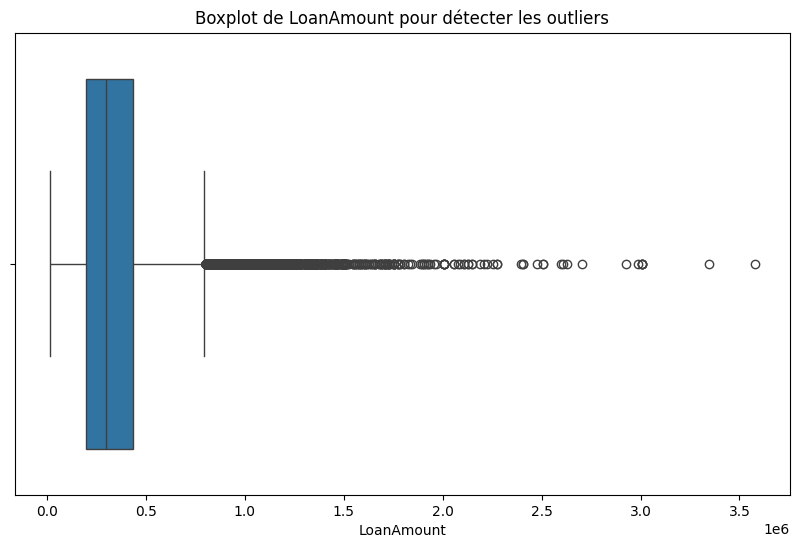

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['loan_amount'])
plt.title("Boxplot de LoanAmount pour détecter les outliers")
plt.xlabel("LoanAmount")
plt.show()

**Interprétation** : Les points qui se trouvent en dehors des "moustaches" du boxplot sont des outliers

#### Visualisation avec un Scatter Plot

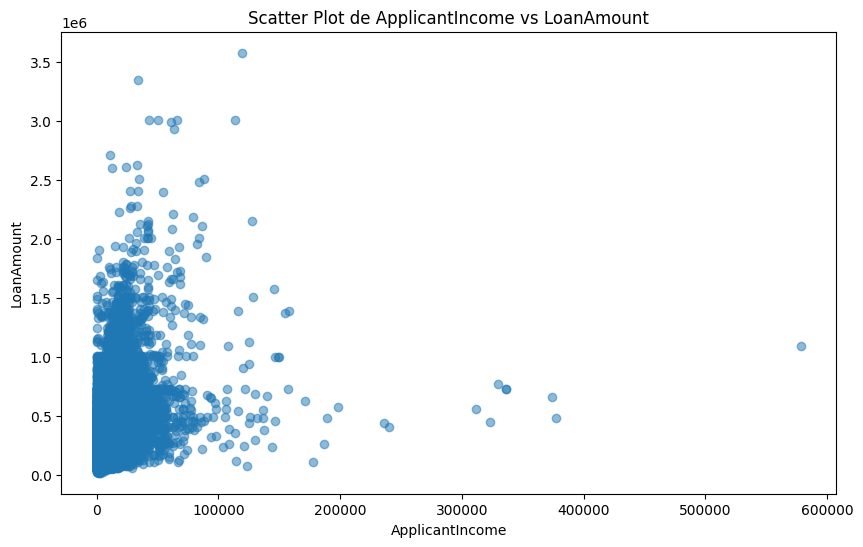

In [55]:
# Exemple de Scatter Plot pour visualiser 'LoanAmount' par rapport au 'ApplicantIncome'
plt.figure(figsize=(10, 6))
plt.scatter(df['income'], df['loan_amount'], alpha=0.5)
plt.title("Scatter Plot de ApplicantIncome vs LoanAmount")
plt.xlabel("ApplicantIncome")
plt.ylabel("LoanAmount")
plt.show()

**Interprétation** : Les points éloignés de la majorité des observations peuvent être considérés comme des outliers.

#### Histogramme pour Visualiser la Distribution

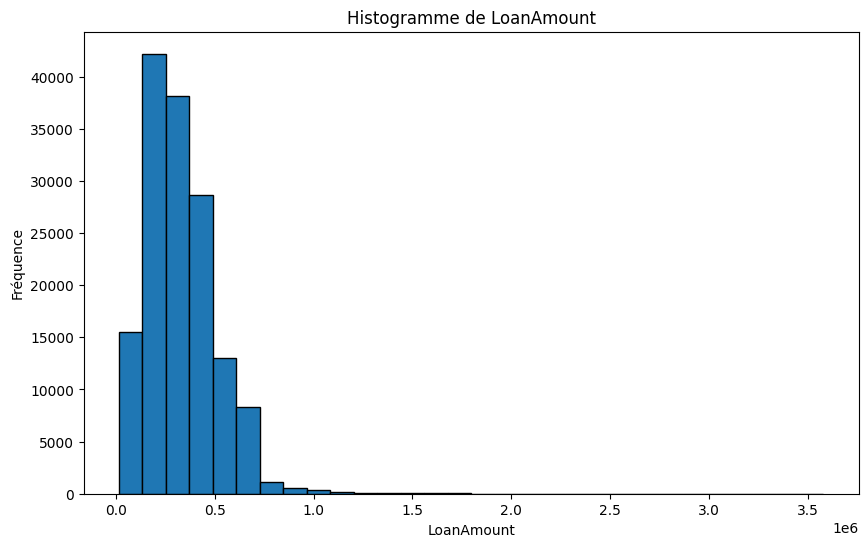

In [56]:
# Exemple d'Histogramme pour visualiser la distribution de 'LoanAmount'
plt.figure(figsize=(10, 6))
plt.hist(df['loan_amount'], bins=30, edgecolor='black')
plt.title("Histogramme de LoanAmount")
plt.xlabel("LoanAmount")
plt.ylabel("Fréquence")
plt.show()


**Interprétation** : Vous pouvez voir si la distribution est asymétrique ou si elle contient des valeurs extrêmes.

#### Utilisation de Pairplot pour Visualisation Multivariée

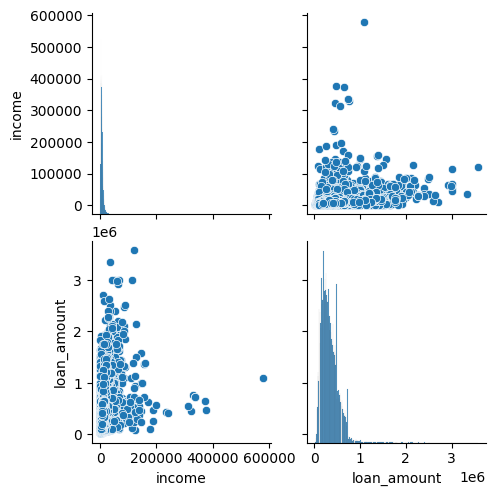

In [58]:
# Exemple de Pairplot pour voir les relations entre plusieurs variables
sns.pairplot(df[['income', 'loan_amount', 'co-applicant_credit_type']])
plt.show()

**Interprétation** : Vous pouvez observer les relations entre les variables et repérer les outliers dans plusieurs dimensions.

### Comment Traiter les Outliers ?

1. Suppression des Outliers
    - **Quand l'utiliser** : Lorsque les outliers sont dus à des erreurs de saisie ou lorsque vous avez suffisamment de données pour que la suppression de ces valeurs ne pose pas de problème.
    - **Exemple** : Si un montant de prêt est de 1 million alors que la plupart des montants sont inférieurs à 100 000, vous pouvez envisager de supprimer cette valeur.

In [60]:
# Exemple de suppression des outliers
Q1 = df['loan_amount'].quantile(0.25)
Q3 = df['loan_amount'].quantile(0.75)
IQR = Q3 - Q1

# Définir les limites
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Supprimer les outliers
data = df[(df['loan_amount'] >= lower_limit) & (df['loan_amount'] <= upper_limit)]

2. Transformation des Données
    - **Quand l'utiliser** : Si les outliers sont naturels et doivent être conservés, vous pouvez transformer les données pour atténuer leur effet.
    - **Méthodes** : Logarithme, racine carrée, ou normalisation.

In [ ]:
# Exemple de transformation logarithmique
df['loan_amount'] = df['loan_amount'].apply(lambda x: np.log(x) if x > 0 else 0)

3. Imputation des Outliers
    - **Quand l'utiliser** : Lorsque vous ne pouvez pas supprimer les outliers mais que vous souhaitez réduire leur impact. Remplacez les valeurs aberrantes par la médiane ou une valeur plus appropriée.

In [62]:
# Exemple d'imputation des outliers par la médiane
median_value = df['loan_amount'].median()
df['loan_amount'] = df['loan_amount'].apply(lambda x: median_value if (x < lower_limit or x > upper_limit) else x)

# Maintenant à vous ! 

Utiliser le [dataset](../../data/fifa21.csv) et performer le preprocessing des données
